In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
dataframe = pd.read_csv("/content/Data - data (2).csv (1).csv")
dataframe.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 08:26,3.39,17850.0,United Kingdom


In [3]:
dataframe.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611121,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
dataframe.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [6]:
dataframe.dropna(inplace = True)

In [7]:
dataframe.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [8]:
dataframe['InvoiceDate']=pd.to_datetime(dataframe['InvoiceDate'])

In [9]:
dataframe['CustomerID']=dataframe['CustomerID'].astype('int')

In [10]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int64         
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.9+ MB


In [11]:
dataframe.query('UnitPrice <=0 or Quantity <=0').count()

,0
InvoiceNo,8945
StockCode,8945
Description,8945
Quantity,8945
InvoiceDate,8945
UnitPrice,8945
CustomerID,8945
Country,8945


In [12]:
filtro_preco = dataframe['UnitPrice'] > 0
filtro_quantidade = dataframe['Quantity'] > 0

In [13]:
dataframe = dataframe[filtro_preco & filtro_quantidade]

In [14]:
dataframe['TotalPrice'] = dataframe['UnitPrice'] * dataframe['Quantity']

In [15]:
dataframe.duplicated().sum()

5192

In [16]:
dataframe.drop_duplicates(inplace=True)

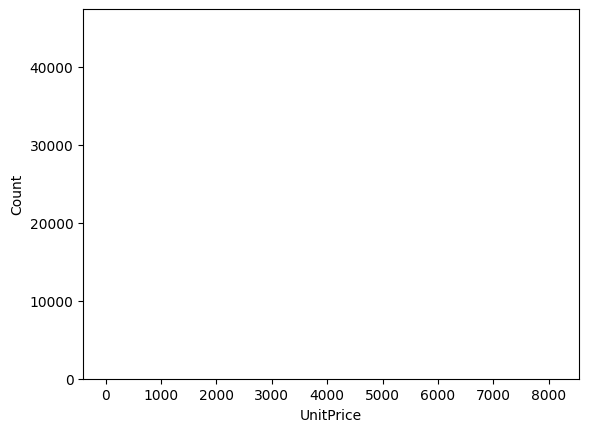

In [17]:
sns.histplot(data=dataframe, x='UnitPrice');

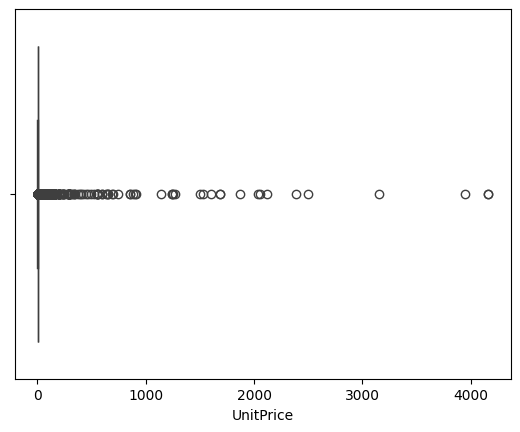

In [ ]:
sns.boxplot(data=dataframe, x='UnitPrice');

In [ ]:
dataframe.boxplot(column='UnitPrice')

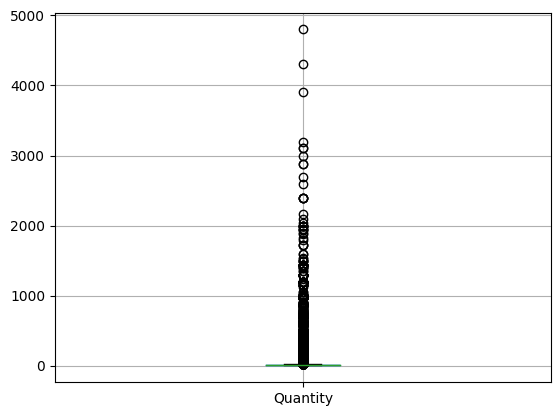

In [ ]:
dataframe.boxplot(column='Quantity');

In [ ]:
filtro_preco = dataframe['UnitPrice'] <5000
filtro_quantidade = dataframe['Quantity'] <10000
dataframe = dataframe[filtro_preco & filtro_quantidade]

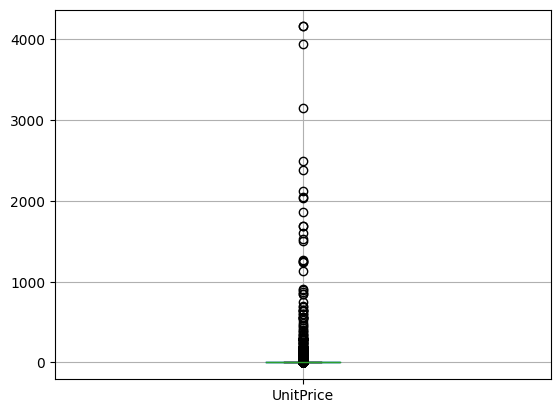

In [ ]:
dataframe.boxplot(column='UnitPrice');

In [ ]:
ultima_compra = dataframe['InvoiceDate'].max()

In [ ]:
top_10_paises = dataframe.groupby('Country').sum('TotalPrice').sort_values(by='TotalPrice', ascending=False).head(10)

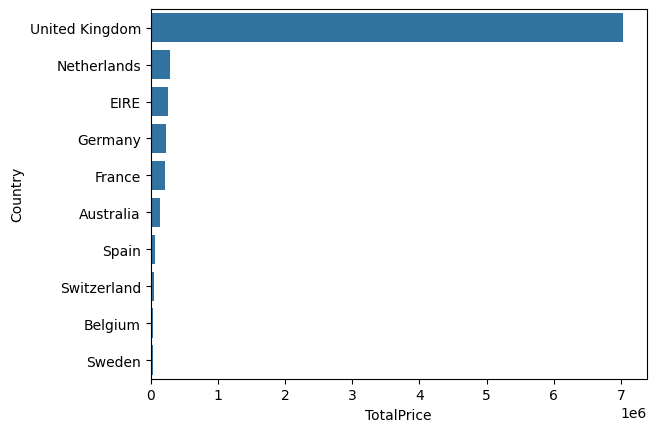

In [ ]:
sns.barplot(data=top_10_paises, y='Country', x='TotalPrice');

In [ ]:
top_10_produtos = dataframe.groupby('StockCode').sum('Quantity').sort_values(by='Quantity', ascending=False).head(10)

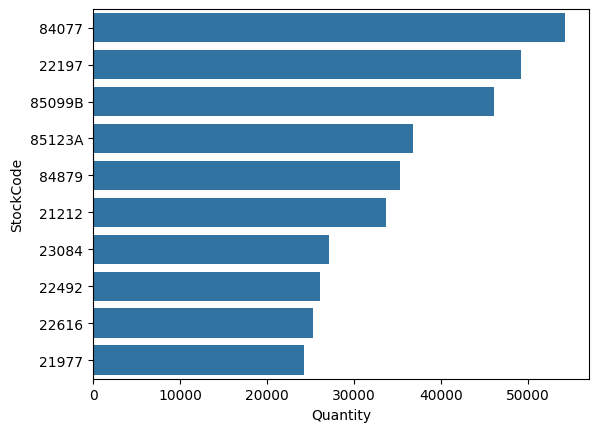

In [ ]:
sns.barplot(data=top_10_produtos, y='StockCode', x='Quantity');

In [ ]:
Mes_compra = dataframe['InvoiceDate'].dt.month

In [ ]:
vendas_por_mes = dataframe.groupby(Mes_compra).sum('TotalPrice')

In [ ]:
print(dataframe.groupby(Mes_compra).sum('TotalPrice').sort_values(by='TotalPrice', ascending=False));

             Quantity  UnitPrice  CustomerID  TotalPrice
InvoiceDate                                             
11             665923  182340.09   969728744  1156205.61
10             591543  164084.09   743951371  1035642.45
9              543652  118162.32   605190709   950692.20
12             516830  127237.22   659024908   919143.57
5              372863   93358.16   427247786   669212.40
6              363014   84602.66   412518212   660046.05
8              397373   78877.09   408614424   644051.04
7              367360   75455.52   406784607   598963.90
3              347582   87864.79   407858866   594081.76
1              274258   66233.61   318054973   490917.71
4              291366   78544.48   342666568   468375.33
2              265027   62619.48   301727994   446084.92


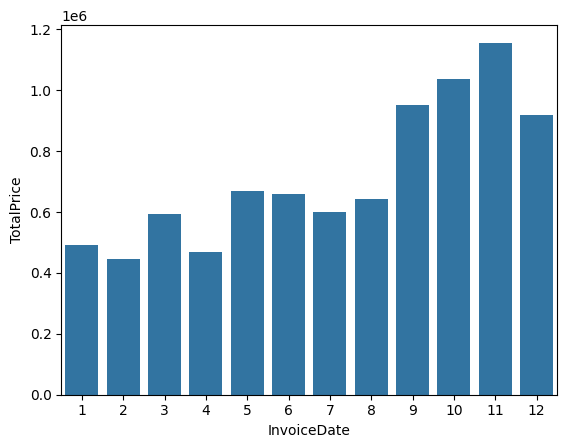

In [ ]:
sns.barplot(data=vendas_por_mes, x='InvoiceDate', y='TotalPrice');

In [ ]:
vendas_mes_pais = dataframe.groupby([Mes_compra,'Country']).sum('TotalPrice').sort_values(by='TotalPrice', ascending=False).head(10)

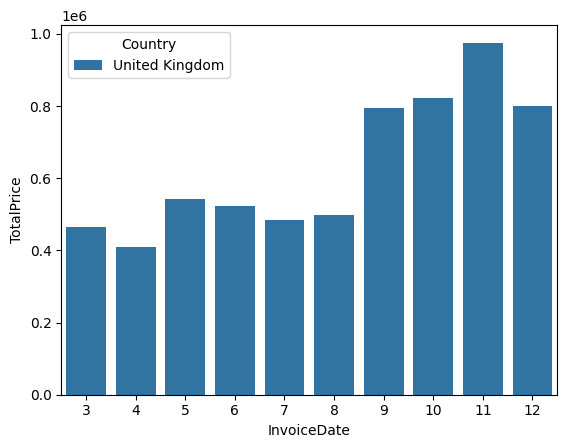

In [ ]:
sns.barplot(data=vendas_mes_pais, x='InvoiceDate', y='TotalPrice', hue='Country');


In [ ]:
tabela_auxiliar=dataframe.groupby(['InvoiceDate','CustomerID']).sum('TotalPrice')


tabela_calculo_rfm=tabela_auxiliar.groupby('CustomerID').sum('TotalPrice')


tabela_calculo_rfm['F'] = tabela_auxiliar['Quantity'].groupby('CustomerID').count()


tabela_calculo_rfm['M'] = tabela_auxiliar['TotalPrice'].groupby('CustomerID').mean('TotalPrice')


tabela_auxiliar.reset_index(inplace = True)


tabela_auxiliar['R'] = ultima_compra-tabela_auxiliar['InvoiceDate']


tabela_auxiliar.drop(columns=['InvoiceDate','Quantity','UnitPrice','TotalPrice'], inplace=True)


tabela_auxiliar.groupby('CustomerID')['R'].min()

,R
CustomerID,
12347,1 days 20:58:00
12348,74 days 23:37:00
12349,18 days 02:59:00
12350,309 days 20:49:00
12352,35 days 22:13:00
...,...
18280,277 days 02:58:00
18281,180 days 01:57:00
18282,7 days 01:07:00


In [ ]:
tabela_calculo_rfm['R'] = tabela_auxiliar.groupby('CustomerID')['R'].min()


tabela_calculo_rfm.head()

,Quantity,UnitPrice,TotalPrice,F,M,R
CustomerID,,,,,,
12347,2458,481.21,4310.00,7,615.714286,1 days 20:58:00
12348,2341,178.71,1797.24,4,449.310000,74 days 23:37:00
12349,631,605.10,1757.55,1,1757.550000,18 days 02:59:00
12350,197,65.30,334.40,1,334.400000,309 days 20:49:00
12352,536,1354.11,2506.04,8,313.255000,35 days 22:13:00
